In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('mtcars.csv')

In [4]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
df.groupby('cyl')['mpg'].mean()

cyl
4    26.663636
6    19.742857
8    15.100000
Name: mpg, dtype: float64

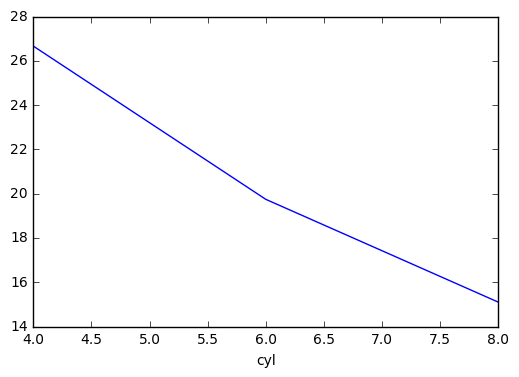

In [6]:
df.groupby('cyl')['mpg'].mean().plot()

In [9]:
df.pivot_table(['mpg','hp'], 'cyl', aggfunc='mean')# so pivot tables are like genrealized groupbys...

,hp,mpg
cyl,,
4,82.636364,26.663636
6,122.285714,19.742857
8,209.214286,15.100000


In [10]:
sp = pd.read_csv('species.csv')

In [11]:
sp.head()

,species_id,genus,species,taxa
0,AB,Amphispiza,bilineata,Bird
1,AH,Ammospermophilus,harrisi,Rodent
2,AS,Ammodramus,savannarum,Bird
3,BA,Baiomys,taylori,Rodent
4,CB,Campylorhynchus,brunneicapillus,Bird


In [12]:
taxa = pd.read_csv('surveys.csv')

In [13]:
taxa.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [14]:
# we have speace id in two data frames .. 

In [15]:
all_data = pd.merge(sp,taxa,on='species_id')

In [16]:
all_data.head()

,species_id,genus,species,taxa,record_id,month,day,year,plot_id,sex,hindfoot_length,weight
0,AB,Amphispiza,bilineata,Bird,3126,7,21,1980,8,NaN,NaN,NaN
1,AB,Amphispiza,bilineata,Bird,3146,7,21,1980,24,NaN,NaN,NaN
2,AB,Amphispiza,bilineata,Bird,3152,7,21,1980,19,NaN,NaN,NaN
3,AB,Amphispiza,bilineata,Bird,3153,7,21,1980,22,NaN,NaN,NaN
4,AB,Amphispiza,bilineata,Bird,3586,12,15,1980,16,NaN,NaN,NaN


In [17]:
len(taxa)

35549

In [18]:
len(all_data)

34786

In [22]:
taxa[taxa['species_id'].isnull()].head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
323,324,10,17,1977,7,NaN,NaN,NaN,NaN
324,325,10,17,1977,10,NaN,NaN,NaN,NaN
325,326,10,17,1977,23,NaN,NaN,NaN,NaN
400,401,11,13,1977,3,NaN,NaN,NaN,NaN
401,402,11,13,1977,15,NaN,NaN,NaN,NaN


In [23]:
all_data = pd.merge(sp,taxa,on='species_id',how='right')

In [24]:
len(all_data)

35549

In [25]:
len(taxa) == len(all_data)

True

In [31]:
all_data['taxa'] = all_data['taxa'].astype("category")


In [32]:
all_data.pivot_table(index=['taxa'])

,day,hindfoot_length,month,plot_id,record_id,weight,year
taxa,,,,,,,
Bird,16.088889,NaN,5.491111,13.886667,13937.411111,NaN,1987.677778
Rabbit,15.440000,NaN,5.786667,13.693333,9089.466667,NaN,1984.066667
Reptile,18.214286,NaN,6.142857,13.714286,20271.785714,NaN,1992.714286
Rodent,16.096651,29.287932,6.488276,11.303559,17873.089760,42.672428,1990.546033


In [33]:
# so we have a lot of missing data that we can deal with ....